![alt text](https://image.slidesharecdn.com/variationalautoencoder-160616085558/95/variational-autoencoder-10-638.jpg?cb=1468290546 "VAE")

In [45]:
import numpy as np
from keras.models import Model, Input
from keras.losses import binary_crossentropy, kullback_leibler_divergence
from keras import backend as K
from keras.datasets.mnist import load_data
from keras.layers import Dense, Lambda

In [46]:
(x_train, _), (x_test, _) = load_data()
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [47]:
input_dim = 784
encoding_dim = 64
latent_dim = 2
batch_size = 100
epochs = 12
alpha = 0.9

In [48]:
x = Input(batch_shape=(batch_size, input_dim))
h = Dense(encoding_dim, activation='relu')(x)

mean = Dense(latent_dim)(h)
var = Dense(latent_dim)(h)

In [49]:
def utility(inp):
    mean, var = inp
    alp = K.random_normal(shape=(batch_size, latent_dim), mean=0.)
    return mean + K.exp(var / 2) * alp

k = Lambda(utility, output_shape=(latent_dim,))([mean, var])

print(k)

Tensor("lambda_8/add:0", shape=(100, 2), dtype=float32)


In [50]:
decoder_h = Dense(encoding_dim, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')

h_decoded = decoder_h(k)
x_decoded_mean = decoder_mean(h_decoded)

print(x_decoded_mean)

Tensor("dense_20/Sigmoid:0", shape=(100, 784), dtype=float32)


In [51]:
def vae_loss(x, x_decoded_mean):
    
    en = input_dim*binary_crossentropy(x, x_decoded_mean)
    kl = 0.5 * kullback_leibler_divergence(x, x_decoded_mean)
    return en + kl

vae = Model(x, x_decoded_mean)
vae.compile(loss=vae_loss, optimizer='adam')
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (100, 784)           0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (100, 64)            50240       input_4[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (100, 2)             130         dense_16[0][0]                   
__________________________________________________________________________________________________
dense_18 (Dense)                (100, 2)             130         dense_16[0][0]                   
__________________________________________________________________________________________________
lambda_8 (

In [52]:
vae.fit(x_train, x_train, shuffle=True, epochs=epochs, batch_size=batch_size)

Epoch 1/12
60000/60000 [==============================] - 8s 133us/step - loss: 239.8339
Epoch 2/12
60000/60000 [==============================] - 7s 122us/step - loss: 206.1943
Epoch 3/12
60000/60000 [==============================] - 7s 117us/step - loss: 197.0780
Epoch 4/12
60000/60000 [==============================] - 7s 116us/step - loss: 191.3192
Epoch 5/12
60000/60000 [==============================] - 9s 151us/step - loss: 187.4781
Epoch 6/12
60000/60000 [==============================] - 9s 150us/step - loss: 184.4305
Epoch 7/12
60000/60000 [==============================] - 8s 132us/step - loss: 181.9649
Epoch 8/12
60000/60000 [==============================] - 8s 138us/step - loss: 180.0855
Epoch 9/12
60000/60000 [==============================] - 7s 117us/step - loss: 178.5594
Epoch 10/12
60000/60000 [==============================] - 7s 124us/step - loss: 177.2811
Epoch 11/12
60000/60000 [==============================] - 7s 112us/step - loss: 176.2665
Epoch 12/12
60000/6

In [54]:
decoder_input = Input(shape=(latent_dim,))
h_decoder = decoder_h(decoder_input)
x_decoder_mean = decoder_mean(h_decoder)
generator = Model(decoder_input, x_decoder_mean)

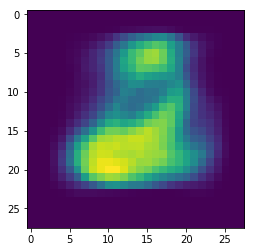

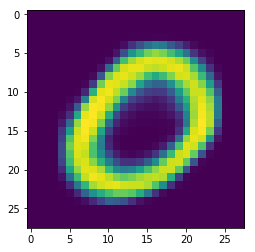

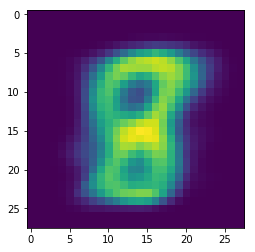

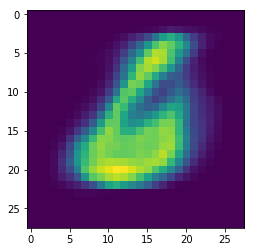

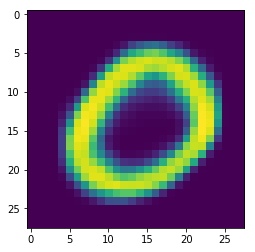

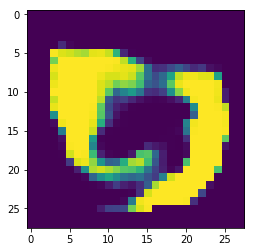

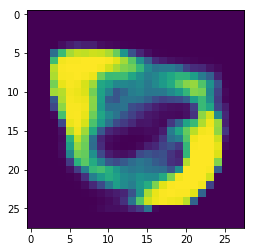

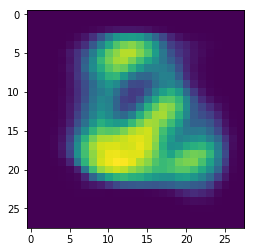

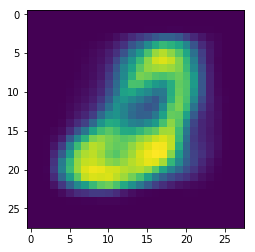

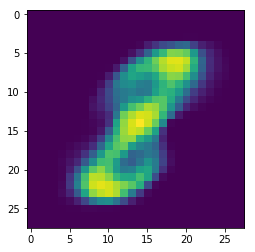

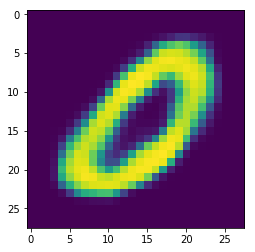

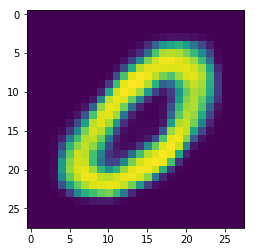

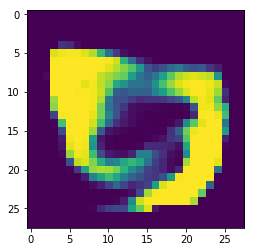

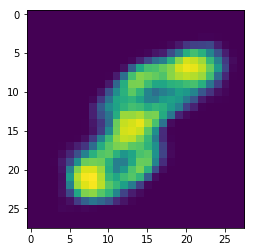

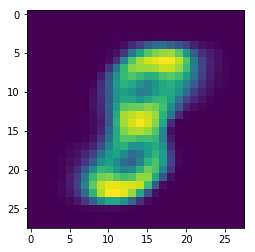

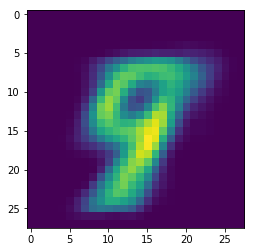

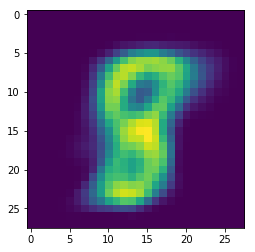

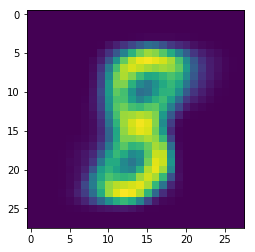

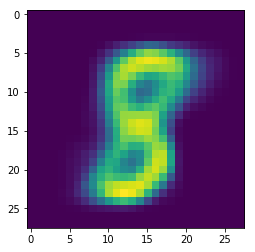

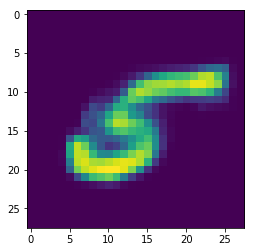

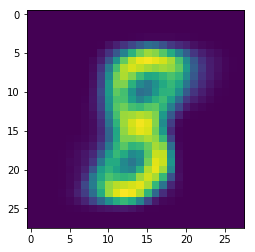

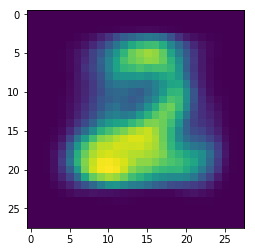

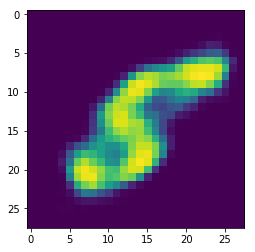

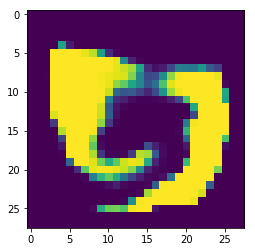

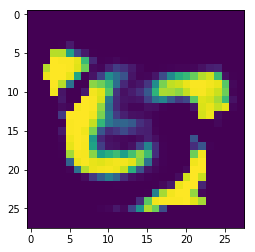

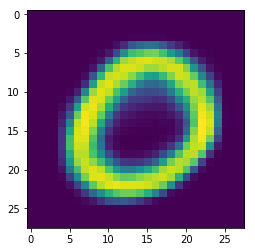

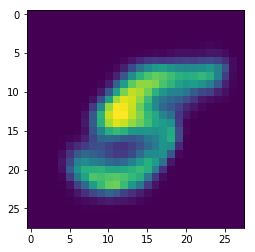

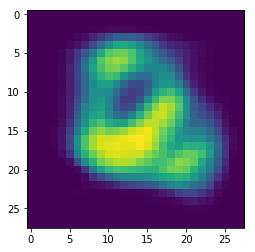

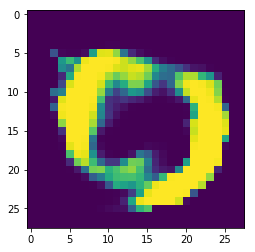

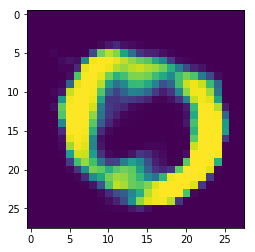

In [91]:
import random
from PIL import Image
import time

for i in range(30):
    z_sample = np.array([[random.randint(-15, 15), random.randint(-15, 15)]]) * alpha
    x_d = generator.predict(z_sample)
    digit = x_d[0].reshape(28, 28)
    plt.imshow(digit)
    img = Image.fromarray(digit, 'L')
    img.save('img{}.png'.format(i))
    time.sleep(0.5)
    plt.show()

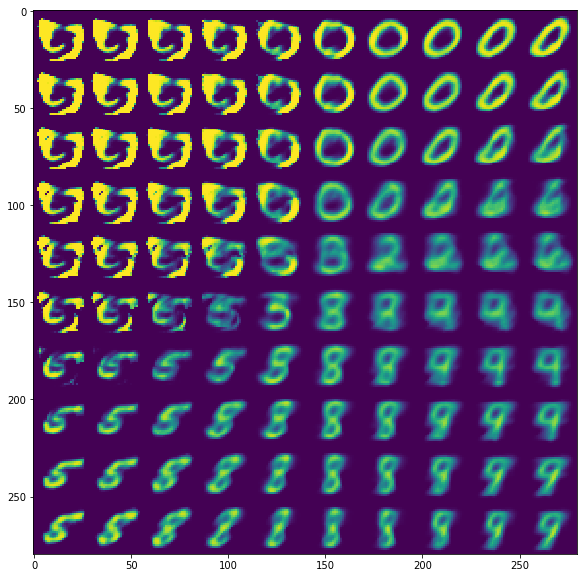

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = np.zeros((28 * 10, 28 * 10))

grid_x = np.linspace(-15, 15, 10)
grid_y = np.linspace(-15, 15, 10)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):

        z_sample = np.array([[xi, yi]]) * alpha
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(28, 28)
        figure[i * 28: (i + 1) * 28,
               j * 28: (j + 1) * 28] = digit
        

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()